In [158]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

# Data Load

In [159]:
df = pd.read_csv('Brazilian_ecommerce (merged).csv', index_col = 0)

# Data Preparation

In [160]:
df['sales'] = df['price'] * df['items_count']

for col in df.columns:
    if col.endswith('_timestamp') or col.endswith('_date') or col.endswith('_at'):
        try:
            # df[col] = pd.to_datetime(df[col]).dt.date
            df[col] = pd.to_datetime(df[col])
            # if col.endswith('_timestamp'):
                # df[col] = pd.to_datetime(df[col])
            # elif col.endswith('_date') or col.endswith('_at'):
                # df[col] = pd.to_datetime(df[col]).dt.date
                # df[col] = pd.to_datetime(df[col]).dt.to_period('M')
        except Exception as e:
            print(f'Error mengonversi kolom {col}: {e}')
            pass

display(df.head())
display(df.info())

,order_id,items_count,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,product_cat_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,sales
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93,pet_shop,56,239,2,30000,50,30,40,1,credit_card,3,259,4,2017-05-13,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,239.90
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87,furniture_decor,59,695,2,3050,33,13,33,1,credit_card,5,216,5,2018-01-23,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10,2018-08-14,2018-08-20,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79,perfumery,42,480,1,200,16,10,15,1,credit_card,2,25,4,2018-08-15,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,-23.104346,-46.595589,14403,franca,SP,-20.554951,-47.387691,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16,2017-03-01,2017-03-17,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14,garden_tools,59,409,1,3750,35,40,30,1,credit_card,3,218,5,2017-03-02,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,-23.245512,-46.825182,87900,loanda,PR,-22.930408,-53.136438,199.90
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17,2017-05-22,2017-06-06,6426d21aca402a131fc0a5d0960a3c90,2017-05-23,21.90,12.69,housewares,36,558,1,450,24,8,15,1,boleto,1,34,4,2017-05-23,2017-05-24 19:00:09,85c835d128beae5b4ce8602c491bf385,38017,uberaba,MG,-19.740324,-47.925353,14091,ribeirao preto,SP,-21.189678,-47.788330,21.90


<class 'pandas.core.frame.DataFrame'>
Index: 93100 entries, 1 to 96459
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       93100 non-null  object        
 1   items_count                    93100 non-null  int64         
 2   customer_id                    93100 non-null  object        
 3   order_status                   93100 non-null  object        
 4   order_purchase_timestamp       93100 non-null  datetime64[ns]
 5   order_approved_at              93100 non-null  datetime64[ns]
 6   order_delivered_carrier_date   93100 non-null  datetime64[ns]
 7   order_delivered_customer_date  93100 non-null  datetime64[ns]
 8   order_estimated_delivery_date  93100 non-null  datetime64[ns]
 9   seller_id                      93100 non-null  object        
 10  shipping_limit_date            93100 non-null  datetime64[ns]
 11  price               

None

In [161]:
df.head()

,order_id,items_count,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,product_cat_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,sales
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.90,19.93,pet_shop,56,239,2,30000,50,30,40,1,credit_card,3,259,4,2017-05-13,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,239.90
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.00,17.87,furniture_decor,59,695,2,3050,33,13,33,1,credit_card,5,216,5,2018-01-23,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,199.00
3,00024acbcdf0a6daa1e931b038114c75,1,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10,2018-08-14,2018-08-20,9d7a1d34a5052409006425275ba1c2b4,2018-08-15,12.99,12.79,perfumery,42,480,1,200,16,10,15,1,credit_card,2,25,4,2018-08-15,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,-23.104346,-46.595589,14403,franca,SP,-20.554951,-47.387691,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16,2017-03-01,2017-03-17,df560393f3a51e74553ab94004ba5c87,2017-02-13,199.90,18.14,garden_tools,59,409,1,3750,35,40,30,1,credit_card,3,218,5,2017-03-02,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,-23.245512,-46.825182,87900,loanda,PR,-22.930408,-53.136438,199.90
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17,2017-05-22,2017-06-06,6426d21aca402a131fc0a5d0960a3c90,2017-05-23,21.90,12.69,housewares,36,558,1,450,24,8,15,1,boleto,1,34,4,2017-05-23,2017-05-24 19:00:09,85c835d128beae5b4ce8602c491bf385,38017,uberaba,MG,-19.740324,-47.925353,14091,ribeirao preto,SP,-21.189678,-47.788330,21.90


# EDA

#### Descriptive Analysis

In [162]:
# Data Describe

df.select_dtypes(include = [int, float]).describe().round(2)

,items_count,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,customer_lat,customer_lng,seller_zip_code_prefix,seller_lat,seller_lng,sales
count,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.0,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00,93100.00
mean,1.20,124.35,20.06,48.20,781.86,2.21,2030.48,29.63,16.13,22.64,1.02,2.9,155.65,4.15,35114.73,-21.20,-46.19,24584.84,-22.80,-47.23,142.97
std,0.75,187.86,15.65,11.48,655.76,1.75,3646.20,16.39,13.20,11.78,0.24,2.7,214.49,1.29,29830.97,5.60,4.06,27722.50,2.76,2.35,241.43
min,1.00,0.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.0,0.00,1.00,1003.00,-33.69,-72.67,1001.00,-32.07,-63.89,0.85
25%,1.00,40.50,13.21,42.00,341.00,1.00,269.00,18.00,8.00,15.00,1.00,1.0,59.00,4.00,11320.00,-23.59,-48.11,6429.00,-23.61,-48.81,46.99
50%,1.00,78.95,16.32,52.00,598.00,1.00,650.00,24.00,13.00,20.00,1.00,2.0,102.00,5.00,24360.00,-22.93,-46.63,13503.00,-23.43,-46.74,89.00
75%,1.00,139.00,21.15,57.00,990.25,3.00,1800.00,37.00,20.00,30.00,1.00,4.0,173.00,5.00,58701.50,-20.14,-43.64,29156.00,-21.76,-46.52,151.90
max,63.00,6735.00,409.68,76.00,3992.00,20.00,40425.00,105.00,105.00,118.00,19.00,24.0,13664.00,5.00,99980.00,42.18,-7.74,99730.00,-2.50,-34.86,14998.50


#### Analisa 1 : "Distribution of Orders by Weektype"

In [163]:
df.head(2)

,order_id,items_count,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,product_cat_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,sales
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.9,19.93,pet_shop,56,239,2,30000,50,30,40,1,credit_card,3,259,4,2017-05-13,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,239.9
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.0,17.87,furniture_decor,59,695,2,3050,33,13,33,1,credit_card,5,216,5,2018-01-23,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,199.0


In [164]:
df_day_end_sales = df.copy()

df_day_end_sales = df_day_end_sales[['order_id', 'items_count', 'price', 'sales',
                                     'order_purchase_timestamp']]
df_day_end_sales['day'] = df_day_end_sales.order_purchase_timestamp.dt.day_name()

# Classifying weektype
def classify_weektype(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

df_day_end_sales['weektype'] = df_day_end_sales.day.apply(classify_weektype)

display(df_day_end_sales.sample(5))
display(df_day_end_sales.info())

,order_id,items_count,price,sales,order_purchase_timestamp,day,weektype
87142,e6fc62ef4617437d265bd9bef92cd9d3,1,134.49,134.49,2018-06-22 21:20:23,Friday,Weekday
31242,52da3d9903e65cea92aa96e6d890ff15,1,24.50,24.50,2017-12-25 15:23:33,Monday,Weekday
41220,6d710101fb9f067dd5385ea1b6021946,1,13.90,13.90,2018-05-31 10:16:12,Thursday,Weekday
10154,1adbc05f8bb9f7f40e1566992a9b5e8d,1,1499.99,1499.99,2018-08-19 09:35:34,Sunday,Weekend
55873,952ae74fec51be4a3dd2b542bd77843d,1,84.90,84.90,2017-06-28 10:48:08,Wednesday,Weekday


<class 'pandas.core.frame.DataFrame'>
Index: 93100 entries, 1 to 96459
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  93100 non-null  object        
 1   items_count               93100 non-null  int64         
 2   price                     93100 non-null  float64       
 3   sales                     93100 non-null  float64       
 4   order_purchase_timestamp  93100 non-null  datetime64[ns]
 5   day                       93100 non-null  object        
 6   weektype                  93100 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.7+ MB


None

In [165]:
df_weektype = df_day_end_sales.groupby('weektype').agg({'order_id' : 'count',
                                                        'items_count' : 'sum',
                                                        'sales': ['sum', 'mean']}).round(2)
df_weektype.columns = ['count', 'items_count', 'sales_sum', 'sales_avg']
df_weektype

,count,items_count,sales_sum,sales_avg
weektype,,,,
Weekday,71712,86299,10285318.76,143.43
Weekend,21388,25290,3025026.24,141.44


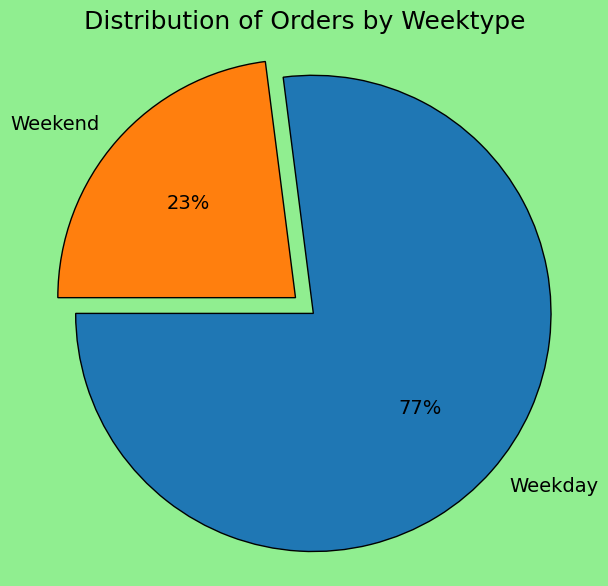

In [166]:
# Pie Chart

df_weektype_dict = df_weektype['count'].to_dict()

labels = df_weektype_dict.keys()
sizes = df_weektype_dict.values()

plt.figure(figsize = (7, 7), facecolor = 'lightgreen')
plt.pie(sizes, labels = labels, 
        autopct = '%1.0f%%', 
        startangle = 180,
        textprops = {'fontsize': 14},
        explode = (0, 0.1),
        wedgeprops = {'edgecolor': 'black'})
        # colors = ['skyblue', 'lightgreen'])
plt.title('Distribution of Orders by Weektype', fontsize = 18)
plt.axis('equal')  
plt.show()

Grafik ini menunjukkan distribusi pesanan berdasarkan jenis hari dalam seminggu, yaitu Weekday (hari kerja) dan Weekend (akhir pekan), dengan rincian berikut:

1. Weekday (Hari Kerja):
    - 77% dari total pesanan dilakukan selama hari kerja (Senin-Jumat).
    - Ini menunjukkan bahwa mayoritas aktivitas pesanan atau transaksi lebih aktif pada hari kerja.

2. Weekend (Akhir Pekan):
    - 23% dari total pesanan dilakukan pada akhir pekan (Sabtu-Minggu).
    - Pesanan pada akhir pekan jauh lebih rendah dibandingkan dengan hari kerja.


Kesimpulan: 

Grafik ini menunjukkan bahwa mayoritas pesanan terjadi pada hari kerja, sementara akhir pekan relatif sepi. Strategi promosi yang lebih agresif dan penawaran eksklusif untuk akhir pekan dapat membantu mengoptimalkan potensi penjualan di periode tersebut. Di sisi lain, menjaga layanan yang optimal dan efisien pada hari kerja sangat penting untuk menjaga kinerja penjualan yang kuat. Insight ini memberikan dasar untuk pengambilan keputusan bisnis yang lebih terfokus berdasarkan perilaku konsumen.


#### Analisa 2 : "Review Score vs Average Shipping Days"

In [167]:
df_shipping_score = df.copy()
df_shipping_score = df_shipping_score[['order_id', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'review_score']]
df_shipping_score['shipment_time'] = abs(df_shipping_score['order_delivered_carrier_date'] - df_shipping_score['order_delivered_customer_date'])
# df_shipping_score['shipment_time'] = df_shipping_score['shipment_time'].dt.day()
# display(df_shipping_score.head())
# display(df_shipping_score.info())
df_shipping_score = df_shipping_score.groupby('review_score').agg(
    avg_shipment_time=('shipment_time', lambda x: x.mean().days), 
    order_count=('order_id', 'count') 
)

# plt.plot(df_shipping_score[['shipment_time']])

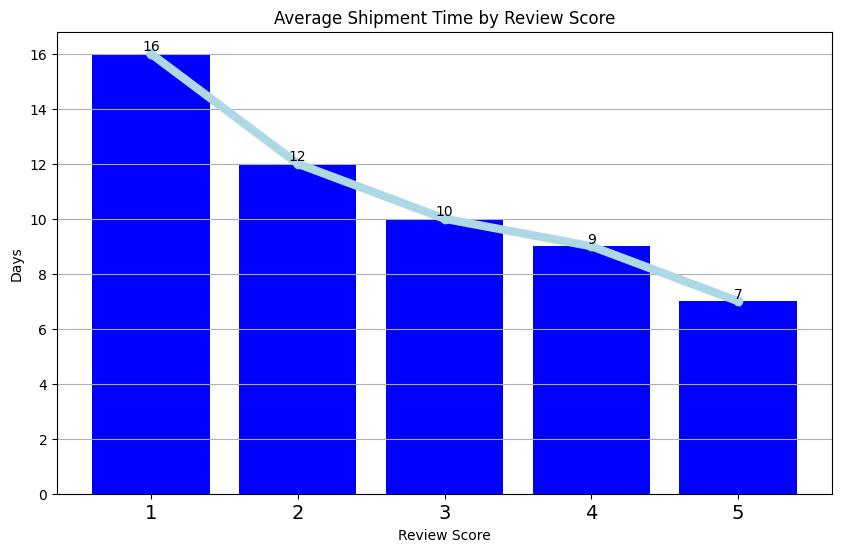

In [168]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df_shipping_score.index, df_shipping_score['avg_shipment_time'], 
               label = 'Shipment Time', color = 'blue')

plt.plot(df_shipping_score.index, df_shipping_score['avg_shipment_time'], 
         color = 'lightblue', marker = 'o', label = 'Avg Shipment Time (days)',
         linewidth = 6)

plt.title('Average Shipment Time by Review Score')
plt.xlabel('Review Score')
plt.ylabel('Days')
plt.xticks(fontsize = 14)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha = 'center', va = 'bottom', fontsize = 10)

plt.grid(axis = 'y')

plt.show()

Grafik ini menunjukkan hubungan antara Review Score (Skor Ulasan) dan Average Shipping Days (Rata-rata Hari Pengiriman). Berikut adalah beberapa poin utama dari analisis grafik:

1. Review Score 1:

    - Rata-rata hari pengiriman adalah 16 hari, yang merupakan waktu pengiriman terlama dalam grafik ini.
    - Skor ulasan rendah, yang bisa mengindikasikan ketidakpuasan pelanggan akibat lamanya waktu pengiriman.

2. Review Score 2:

    - Rata-rata hari pengiriman berkurang menjadi 12 hari.
    - Ada sedikit peningkatan dalam ulasan, namun masih relatif rendah dibandingkan dengan skor ulasan yang lebih tinggi.

3. Review Score 3:

    - Pengiriman rata-rata menurun menjadi 10 hari, dan skor ulasan meningkat menjadi 3.
    - Meskipun waktu pengiriman berkurang, ulasan tetap berada di tingkat menengah.

4. Review Score 4:

    - Pengiriman rata-rata adalah 9 hari, yang menunjukkan perbaikan dalam kecepatan pengiriman.
    - Skor ulasan lebih baik, yang bisa mencerminkan kepuasan pelanggan yang meningkat seiring dengan waktu pengiriman yang lebih singkat.

5. Review Score 5:

    - Rata-rata hari pengiriman terendah adalah 7 hari, dan skor ulasan adalah yang tertinggi.
    - Ini menunjukkan bahwa pelanggan dengan pengalaman pengiriman yang lebih cepat cenderung memberikan ulasan yang lebih baik.

Kesimpulan

1. Korelasi Negatif antara Skor Ulasan dan Waktu Pengiriman:

    - Ada korelasi negatif yang jelas antara rata-rata hari pengiriman dan skor ulasan. Semakin lama waktu pengiriman, semakin rendah skor ulasan yang diberikan pelanggan.

2. Waktu Pengiriman Mempengaruhi Kepuasan Pelanggan:

    - Pelanggan cenderung memberikan ulasan yang lebih baik ketika waktu pengiriman lebih singkat. Pengalaman pengiriman yang lama menyebabkan ketidakpuasan dan menghasilkan ulasan yang lebih rendah.

3. Review Skor Tertinggi pada Pengiriman Tercepat:

    - Skor ulasan tertinggi (skor 5) dikaitkan dengan pengiriman yang cepat (rata-rata 7 hari). Hal ini menunjukkan bahwa pengiriman cepat memberikan dampak positif yang signifikan terhadap persepsi pelanggan.

#### Analisa 3 : "Distribution of Orders by Payment Type"

In [169]:
df.payment_type.value_counts()

payment_type
credit_card    70647
boleto         18535
voucher         2487
debit_card      1431
Name: count, dtype: int64

In [170]:
df.head(2)

,order_id,items_count,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,product_cat_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,sales
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.9,19.93,pet_shop,56,239,2,30000,50,30,40,1,credit_card,3,259,4,2017-05-13,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,239.9
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.0,17.87,furniture_decor,59,695,2,3050,33,13,33,1,credit_card,5,216,5,2018-01-23,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,199.0


In [171]:
df_payment = df.copy()
df_payment = df_payment.groupby('payment_type')['order_id'].count()
df_payment = df_payment.to_dict()

df_payment

{'boleto': 18535, 'credit_card': 70647, 'debit_card': 1431, 'voucher': 2487}

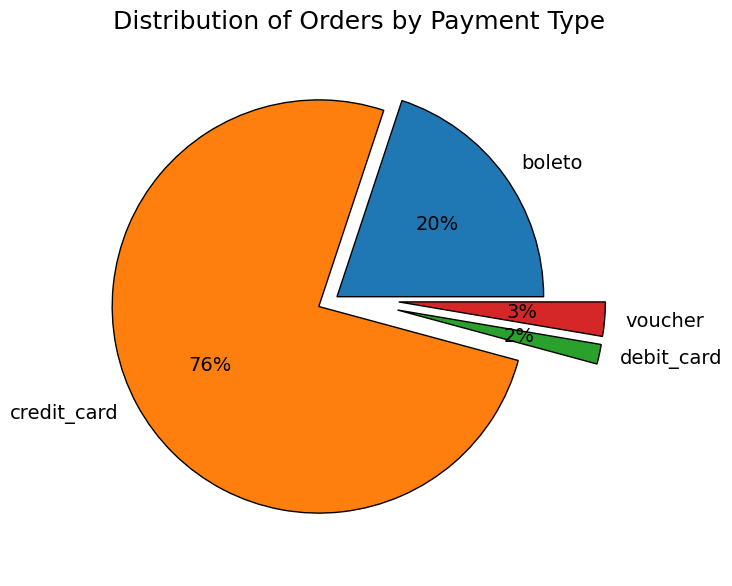

In [172]:
# Pie Chart

labels = df_payment.keys()
sizes = df_payment.values()

plt.figure(figsize = (7, 7), facecolor = 'white')
plt.pie(sizes, labels = labels, 
        autopct = '%1.0f%%', 
        startangle = 0,
        textprops = {'fontsize': 14},
        explode = (0, 0.1, 0.3, 0.3),
        wedgeprops = {'edgecolor': 'black'})
        # colors = ['skyblue', 'lightgreen'])
plt.title('Distribution of Orders by Payment Type', fontsize = 18)
plt.axis('equal')  
plt.show()

Grafik ini adalah pie chart yang menggambarkan distribusi pesanan berdasarkan metode pembayaran yang digunakan oleh pelanggan. Berikut adalah poin utama dari analisis:

1. Credit Card (76%):

    - Sebagian besar pesanan (76%) menggunakan kartu kredit sebagai metode pembayaran.
    - Ini menunjukkan bahwa kartu kredit adalah metode pembayaran yang paling dominan dan disukai oleh mayoritas pelanggan.

2. Boleto (20%):

    - 20% pesanan dilakukan menggunakan boleto, yaitu metode pembayaran populer di Brazil yang menggunakan slip pembayaran.
    - Meskipun jauh lebih kecil dibandingkan dengan kartu kredit, metode ini masih signifikan bagi sebagian pelanggan.

3. Voucher (3%):

    - Hanya 3% pesanan yang dilakukan menggunakan voucher.
    - Metode pembayaran ini jarang digunakan dan mungkin hanya berlaku untuk segmen pelanggan tertentu atau untuk transaksi tertentu seperti promo atau diskon.

4. Debit Card (2%):

    - Metode pembayaran dengan kartu debit digunakan hanya untuk 2% dari total pesanan.
    - Ini menandakan bahwa pelanggan cenderung lebih memilih kartu kredit atau metode pembayaran lainnya dibandingkan kartu debit.


Kesimpulan

1. Dominasi Penggunaan Kartu Kredit:

    - Kartu kredit merupakan metode pembayaran yang paling populer dengan 76% pesanan dilakukan melalui kartu kredit.
    - Hal ini menunjukkan bahwa pelanggan lebih memilih kenyamanan dan fleksibilitas yang ditawarkan oleh kartu kredit.

2. Popularitas Boleto:

    - Meskipun tidak sepopuler kartu kredit, boleto tetap merupakan metode pembayaran yang penting, dengan 20% pesanan menggunakan metode ini.
    - Ini mencerminkan bahwa sebagian pelanggan mungkin lebih nyaman dengan metode pembayaran berbasis slip.

3. Penggunaan Rendah untuk Voucher dan Kartu Debit:

    - Voucher dan kartu debit hanya menyumbang 5% dari total pesanan, yang berarti kedua metode ini jarang digunakan.
    - Mungkin ada peluang untuk mendorong penggunaan kedua metode ini, terutama jika ada promosi yang mendukungnya.

#### Analisa 5 : "Sales and Review Correlation"

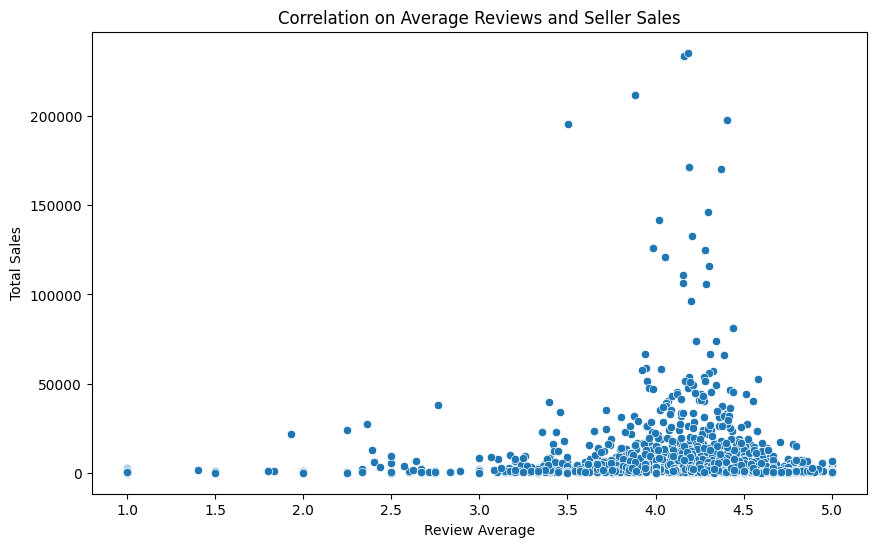

In [173]:
seller_reviews = df.groupby('seller_id')['review_score'].mean().reset_index()
seller_sales = df.groupby('seller_id')['sales'].sum().reset_index()

sales_reviews_sum = pd.merge(seller_reviews, seller_sales, on='seller_id')

# Plot korelasi
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'review_score',
                y = 'sales', 
                data = sales_reviews_sum)
plt.title('Correlation on Average Reviews and Seller Sales')
plt.xlabel('Review Average')
plt.ylabel('Total Sales')
plt.show()

Grafik ini adalah scatter plot yang menggambarkan hubungan antara Review Average (Rata-rata Ulasan) di sumbu X dan Total Sales (Penjualan Total) di sumbu Y. Setiap titik mewakili penjualan yang terkait dengan skor ulasan rata-rata tertentu. Berikut adalah poin utama dari analisis grafik:

Poin Utama Analisis:
1. Rata-rata Ulasan Rendah (1.0 - 2.5):

    - Pada kisaran review score 1.0 hingga 2.5, sebagian besar penjual mencatat penjualan rendah, dengan banyak titik berkumpul di dekat sumbu Y yang menunjukkan penjualan mendekati nol.
    - Tidak ada outliers signifikan di area ini yang menunjukkan penjualan yang sangat tinggi meskipun dengan skor ulasan rendah.

2. Rata-rata Ulasan Menengah (2.5 - 3.5):

    - Pada kisaran review score 2.5 hingga 3.5, terdapat sedikit peningkatan dalam variasi penjualan, namun sebagian besar penjualan tetap berada pada tingkat yang relatif rendah.
    - Masih ada beberapa titik dengan penjualan yang sedikit lebih tinggi, tetapi mayoritas tetap rendah.

3. Rata-rata Ulasan Tinggi (4.0 - 5.0):

    - Pada kisaran review score 4.0 hingga 5.0, terdapat peningkatan signifikan dalam jumlah penjualan. Sebagian besar penjual dengan ulasan rata-rata yang tinggi (di atas 4.0) memiliki penjualan yang lebih tinggi.
    - Ada outliers di sekitar 4.5 hingga 5.0 yang menunjukkan penjualan yang sangat tinggi (di atas 100.000), yang mengindikasikan bahwa penjual dengan ulasan rata-rata mendekati sempurna sering kali mengalami peningkatan penjualan yang signifikan.

Kesimpulan

1. Korelasi Positif antara Rata-rata Ulasan dan Penjualan:

    - Ada korelasi positif yang jelas antara rata-rata ulasan dan penjualan. Penjual dengan ulasan rata-rata lebih tinggi (di atas 4.0) cenderung mencatat penjualan yang lebih tinggi dibandingkan penjual dengan ulasan rata-rata rendah (di bawah 3.0).

2. Rata-rata Ulasan Rendah Mencerminkan Penjualan yang Rendah:

    - Penjual dengan ulasan rata-rata rendah (di bawah 2.5) cenderung memiliki penjualan yang sangat rendah, menunjukkan bahwa kualitas produk atau layanan yang buruk berdampak langsung pada kinerja penjualan.

3. Outliers pada Ulasan Tinggi (4.0 - 5.0):

    - Ada beberapa penjual yang memiliki penjualan sangat tinggi di kisaran ulasan 4.0 hingga 5.0, menunjukkan bahwa ulasan positif yang konsisten dapat mendongkrak penjualan secara signifikan.


#### Analisa 6 : Sales and Reviews Heatmap

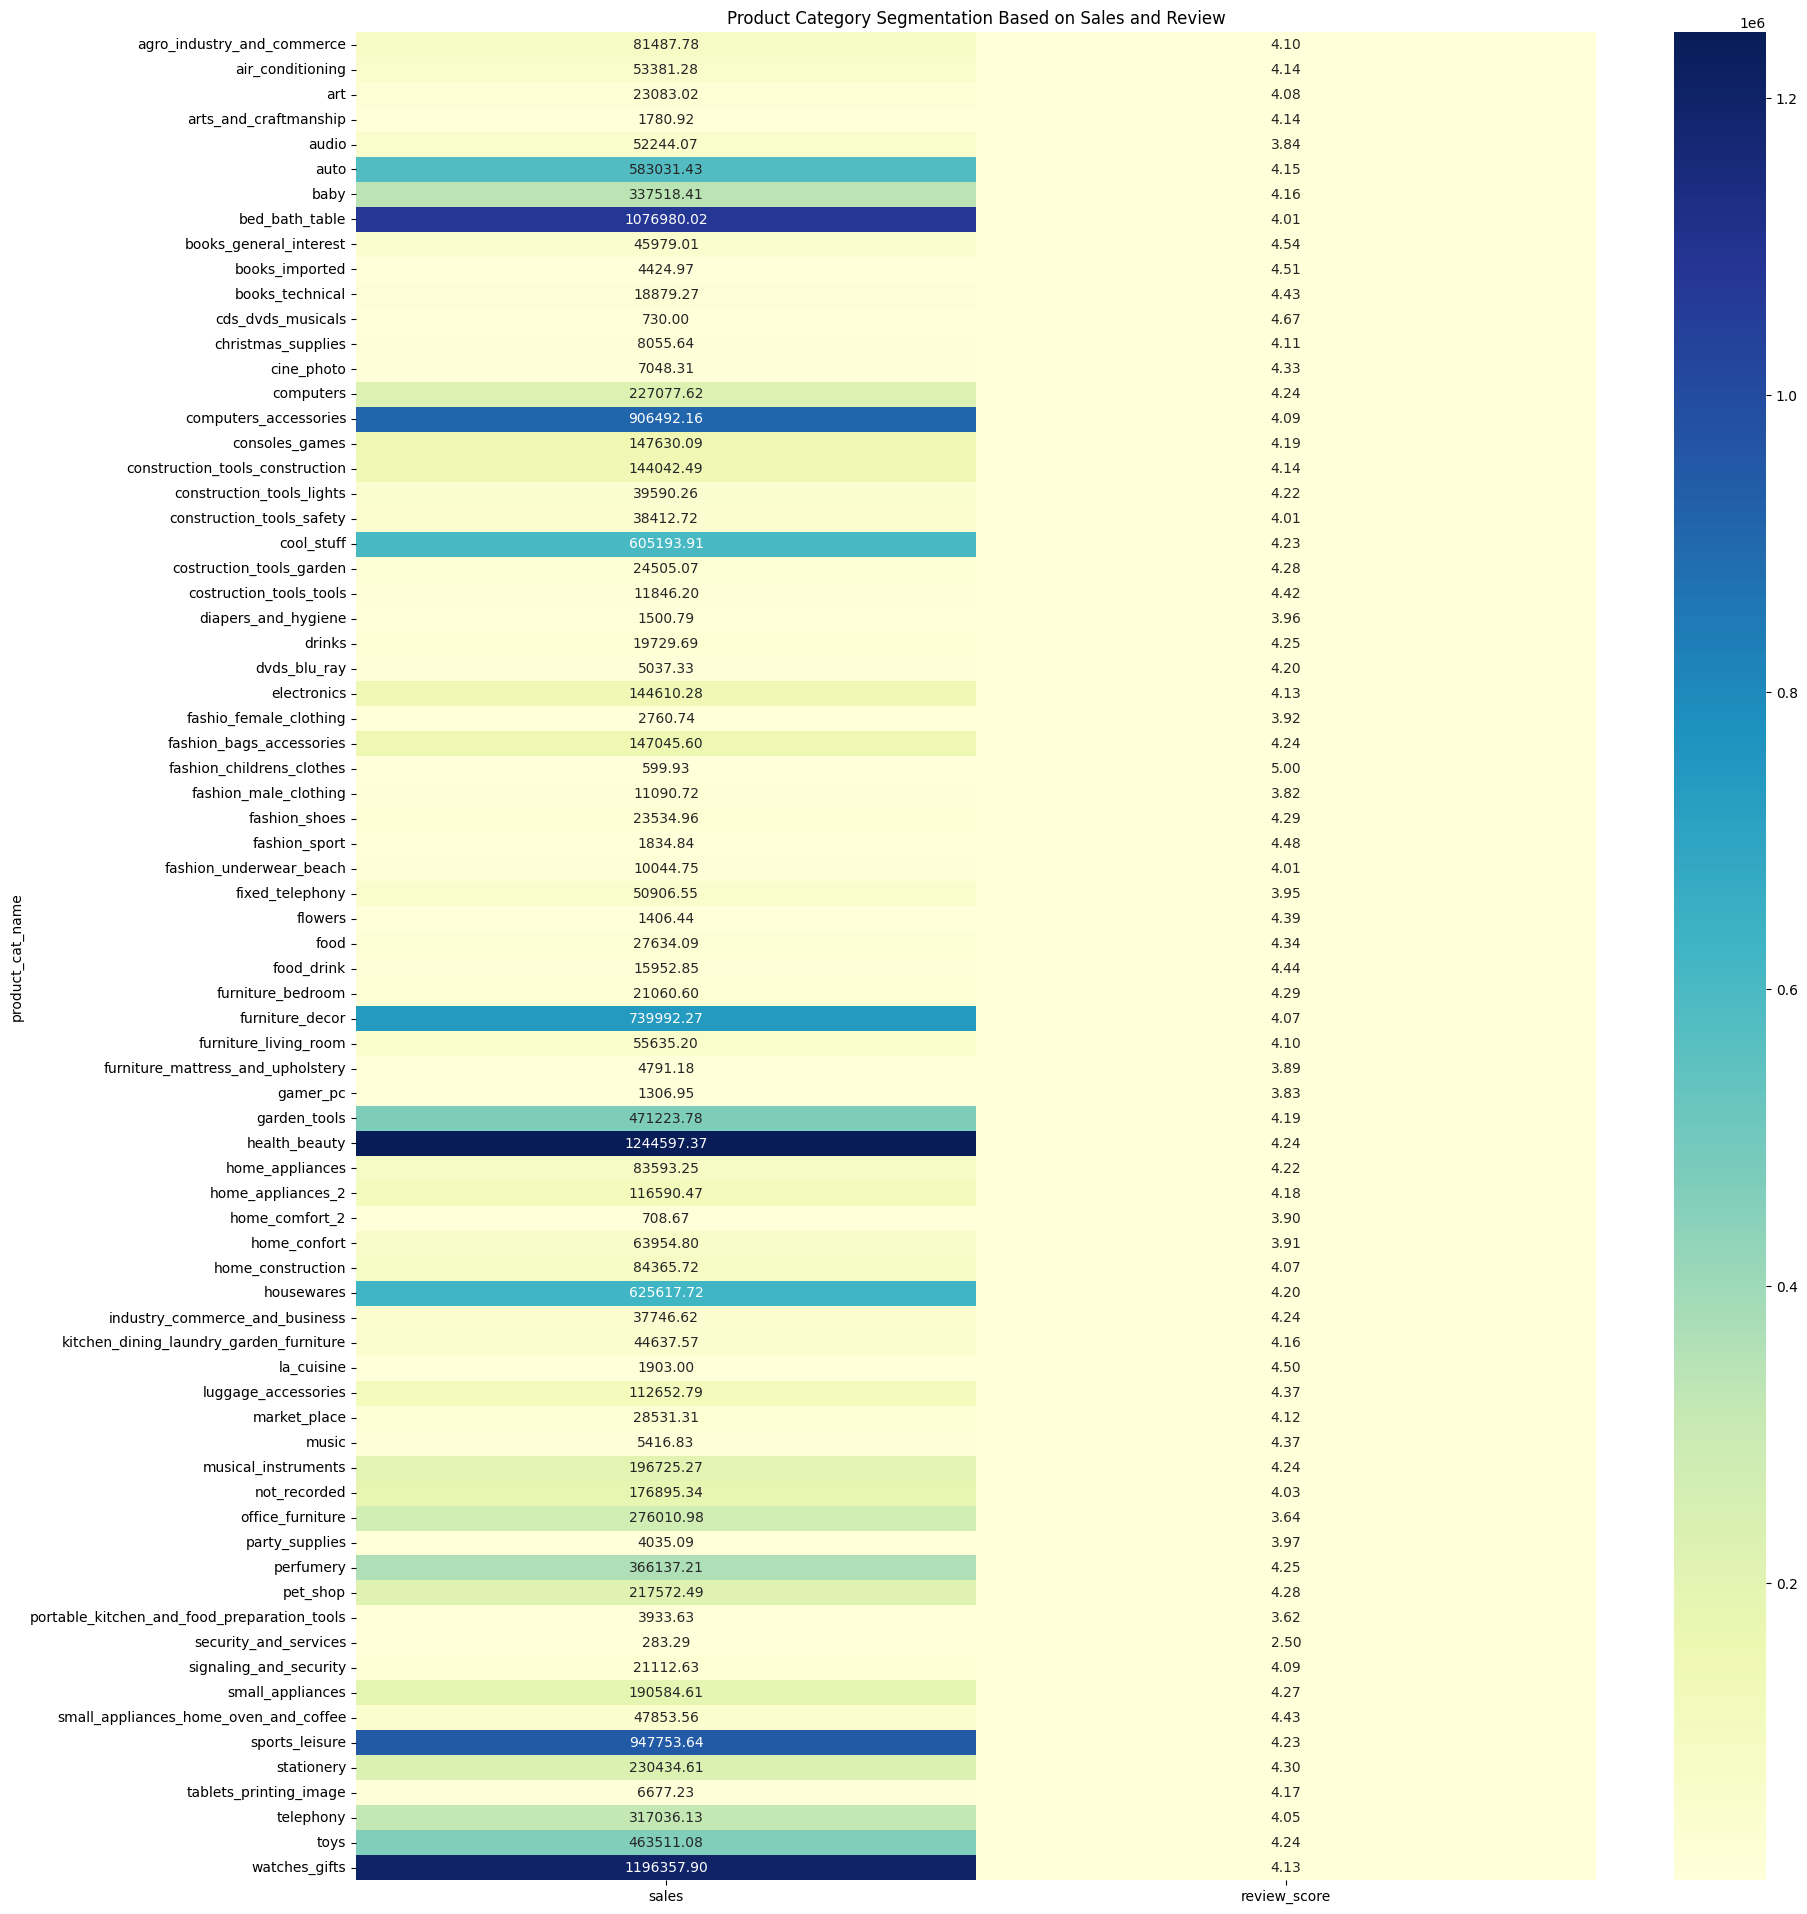

In [174]:
category_sales = df.groupby('product_cat_name')['sales'].sum().reset_index()
category_reviews = df.groupby('product_cat_name')['review_score'].mean().reset_index()

category_data = pd.merge(category_sales, category_reviews, on='product_cat_name')

# Heatmap untuk segmentasi kategori
category_data.set_index('product_cat_name', inplace = True)
plt.figure(figsize = (20, 24))
sns.heatmap(category_data, annot = True, cmap = 'YlGnBu', fmt = '.2f')
# plt.title('Segmentasi Kategori Produk berdasarkan Penjualan dan Review')
plt.title('Product Category Segmentation Based on Sales and Review')
plt.show()

Heatmap ini menunjukkan bahwa kategori produk dengan penjualan tertinggi (ditandai dengan warna biru tua) umumnya memiliki ulasan yang baik (rata-rata skor ulasan sekitar 4.1 hingga 4.5). Beberapa kategori dengan penjualan lebih rendah (warna lebih terang) tetap menunjukkan ulasan yang baik, menandakan bahwa ulasan positif tidak selalu berkorelasi langsung dengan tingginya penjualan. Secara keseluruhan, produk dengan penjualan besar cenderung mempertahankan ulasan yang positif.

### Analisa 7 : "Correlation between delivery time and sales"

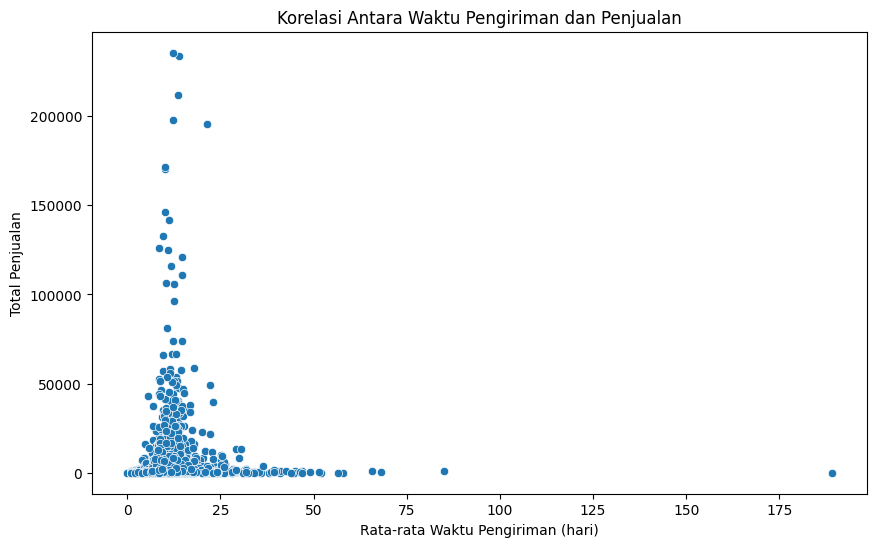

In [175]:
df_dlv_time = df.copy()

df_dlv_time['delivery_time'] = (df_dlv_time['order_delivered_customer_date'] - df_dlv_time['order_purchase_timestamp']).dt.days

seller_delivery_time = df_dlv_time.groupby('seller_id')['delivery_time'].mean().reset_index()
seller_sales = df_dlv_time.groupby('seller_id')['sales'].sum().reset_index()

delivery_sales = pd.merge(seller_delivery_time, seller_sales, on='seller_id')

# Plot delivery time vs sales
plt.figure(figsize = (10,6))
sns.scatterplot(x='delivery_time', y='sales', data = delivery_sales)
plt.title('Korelasi Antara Waktu Pengiriman dan Penjualan')
plt.xlabel('Rata-rata Waktu Pengiriman (hari)')
plt.ylabel('Total Penjualan')
plt.show()

- Mayoritas penjual memiliki waktu pengiriman yang lebih cepat (di bawah 10 hari) dan penjualan yang bervariasi, namun cenderung lebih tinggi dibandingkan dengan penjual yang memiliki waktu pengiriman lebih lama.

- Terlihat bahwa ketika waktu pengiriman meningkat, penjualan cenderung menurun. Penjual dengan waktu pengiriman yang lebih lama umumnya memiliki penjualan yang lebih rendah.

- Ada beberapa penjual dengan waktu pengiriman yang jauh lebih lama (di bagian kanan scatter plot), namun mereka tampaknya memiliki penjualan yang sangat kecil.

Scatter plot ini menunjukkan bahwa waktu pengiriman yang lebih cepat cenderung berkorelasi dengan penjualan yang lebih tinggi, sementara waktu pengiriman yang lebih lama dikaitkan dengan penjualan yang lebih rendah. Penjual yang dapat mengirimkan produk lebih cepat tampaknya memiliki kinerja penjualan yang lebih baik.

In [176]:
df['order_delivered_customer_date']
# df['order_purchase_timestamp']

1       2017-05-12
2       2018-01-22
3       2018-08-14
4       2017-03-01
5       2017-05-22
           ...    
96455   2018-05-10
96456   2018-07-23
96457   2017-10-28
96458   2017-08-16
96459   2018-06-14
Name: order_delivered_customer_date, Length: 93100, dtype: datetime64[ns]

In [177]:
seller_1_month = seller_avg_growth[seller_avg_growth.months == 1]
seller_3_month = seller_avg_growth[(2 <= seller_avg_growth.months) & (seller_avg_growth.months <= 3)]
seller_6_month = seller_avg_growth[(4 <= seller_avg_growth.months) & (seller_avg_growth.months <= 6)]
seller_9_month = seller_avg_growth[(7 <= seller_avg_growth.months) & (seller_avg_growth.months <= 9)]
seller_12_month = seller_avg_growth[(10 <= seller_avg_growth.months) & (seller_avg_growth.months <= 12)]
seller_12_up_month = seller_avg_growth[seller_avg_growth.months > 12]

print(f'''Seller Count Based on Timelength & Avg Seller Sales:
1 Month Seller    : {len(seller_1_month)}, average : {seller_1_month.avg_growth_rate.mean().round(2)}
3 Month Seller    : {len(seller_3_month)}, average : {seller_3_month.avg_growth_rate.mean().round(2)}
6 Month Seller    : {len(seller_6_month)}, average : {seller_6_month.avg_growth_rate.mean().round(2)}
9 Month Seller    : {len(seller_9_month)}, average : {seller_9_month.avg_growth_rate.mean().round(2)}
12 Month Seller   : {len(seller_12_month)}, average : {seller_12_month.avg_growth_rate.mean().round(2)}
> 12 Month Seller : {len(seller_12_up_month)}, average : {seller_12_up_month.avg_growth_rate.mean().round(2)}''')

Seller Count Based on Timelength & Avg Seller Sales:
1 Month Seller    : 661, average : 0.0
3 Month Seller    : 733, average : 54.21
6 Month Seller    : 596, average : 86.26
9 Month Seller    : 278, average : 101.88
12 Month Seller   : 219, average : 91.29
> 12 Month Seller : 339, average : 87.64


Kesimpulan:

- Periode Pertumbuhan Tercepat (3-9 Bulan): Penjual mengalami peningkatan terbesar antara bulan ke-3 hingga ke-9, di mana mereka mencapai puncak penjualan pada bulan ke-9. Hal ini menunjukkan bahwa dalam periode waktu ini, penjual telah menyesuaikan strategi dan menemukan cara efektif untuk mencapai target penjualan yang optimal.

- Tantangan Setelah 9 Bulan: Setelah mencapai puncak pada bulan ke-9, rata-rata penjualan mulai menurun. Ini bisa menandakan bahwa setelah penjual memasuki pasar dengan sukses, mempertahankan momentum dan daya saing menjadi lebih sulit.

- Penjual Baru Kesulitan Memulai: Rata-rata penjualan 0.0 di bulan pertama menunjukkan kesulitan bagi penjual baru untuk memulai. Mereka mungkin membutuhkan lebih banyak dukungan dari platform untuk berhasil menjual dalam waktu singkat.

Insight:

1. Penjual yang Bertahan Lebih Lama Cenderung Sukses: Semakin lama penjual bertahan di platform, semakin besar peluang mereka untuk meningkatkan penjualan. Ini terlihat dari peningkatan rata-rata penjualan antara bulan ke-3 hingga ke-9.

2. Penjual Baru Membutuhkan Waktu untuk Beradaptasi: Penjual dalam bulan pertama biasanya belum menghasilkan penjualan. Mungkin ada kurva pembelajaran atau penyesuaian terhadap platform yang membuat penjual baru perlu waktu lebih lama untuk berhasil.

3. Puncak Penjualan pada 9 Bulan: Penjual mencapai puncak performa pada bulan ke-9. Ini menunjukkan bahwa strategi yang digunakan oleh penjual selama periode ini efektif. Namun, penurunan setelah 9 bulan bisa menjadi indikasi bahwa beberapa penjual mungkin mengalami kesulitan dalam mempertahankan daya saing.

4. Penurunan Setelah 12 Bulan: Meskipun penjual lebih dari 12 bulan masih memiliki rata-rata penjualan yang tinggi, ada penurunan dari puncak di bulan ke-9. Ini bisa menunjukkan tantangan dalam mempertahankan keberhasilan jangka panjang tanpa inovasi atau pembaruan strategi.

Rekomendasi:

1. Program Pembelajaran dan Dukungan untuk Penjual Baru (0-3 Bulan):

    - Pendampingan dan Bimbingan: Berikan program onboarding dan mentorship yang efektif kepada penjual baru untuk membantu mereka memahami cara kerja platform dan strategi penjualan yang tepat.
    - Promosi Khusus untuk Penjual Baru: Berikan insentif seperti diskon, promosi, atau visibilitas lebih tinggi di bulan pertama untuk mendorong penjual baru memulai lebih cepat.

2. Fokus pada Penjual 3-9 Bulan untuk Memaksimalkan Pertumbuhan:

    - Strategi Penjualan Proaktif: Penjual di antara bulan ke-3 dan ke-9 mengalami peningkatan penjualan yang signifikan. Platform harus memfokuskan sumber daya untuk mendukung penjual dalam periode ini melalui strategi penjualan yang lebih agresif, seperti pemasaran, promosi, atau bantuan dalam penargetan pasar.
    - Peningkatan Fitur Analitik: Berikan akses ke analisis performa bagi penjual dalam periode ini untuk membantu mereka memahami bagaimana mereka dapat memaksimalkan penjualan lebih lanjut.

3. Menjaga Momentum Penjualan Setelah 9 Bulan:

    - Inovasi Produk dan Strategi: Penjual yang telah mencapai 9 bulan mungkin membutuhkan dukungan dalam inovasi produk atau memperluas target pasar. Berikan saran tentang tren pasar terbaru atau cara mengembangkan portofolio produk mereka.
    - Program Loyalitas: Implementasikan program loyalitas untuk penjual jangka panjang yang dapat memberikan penghargaan atau promosi tambahan kepada mereka yang berhasil bertahan di platform untuk waktu yang lama.

4. Tinjau Kinerja Penjual > 12 Bulan:

    - Dukungan dalam Diversifikasi: Penjual yang sudah lebih dari 12 bulan mungkin mengalami saturasi pasar. Dorong mereka untuk melakukan diversifikasi produk atau memasuki pasar baru untuk mencegah stagnasi.
    - Retensi Penjual Jangka Panjang: Untuk mempertahankan penjual jangka panjang, platform dapat menawarkan insentif atau program yang membantu mereka tetap kompetitif.

In [178]:
seller_6_month.sort_values(by = ['seller_id', 'months'])

,seller_id,avg_growth_rate,months
9,00fc707aaaad2d31347cf883cd2dfe10,583.02,6
16,014d9a685fd57276679edd00e07089e5,43.60,4
18,01bcc9d254a0143f0ce9791b960b2a47,115.89,5
19,01c97ebb5cdac52891c0ed1c37ba0012,71.29,6
21,01ed254b9ff8407dfb9d99ba1e17d923,-29.60,4
...,...,...,...
2807,fec6275253471ace26d209bbaa64cd0f,16.67,5
2815,ff4e2d38692ce827b1a4f4b8196e680d,15.48,6
2816,ff4ea69c2a729e83e63c7579e4ef8170,69.70,4
2819,ffa6adafb71b807dc13159e26431354c,28.28,5


In [179]:
seller_monthly_sales[seller_monthly_sales.seller_id == 'a3dd39f583bc80bd8c5901c95878921e']

,seller_id,month_order,sales,monthly_growth,seller_count
9948,a3dd39f583bc80bd8c5901c95878921e,2017-08,53.89,0.000000,8
9949,a3dd39f583bc80bd8c5901c95878921e,2017-09,52.00,-3.507144,8
9950,a3dd39f583bc80bd8c5901c95878921e,2017-10,2631.16,4959.923077,8
9951,a3dd39f583bc80bd8c5901c95878921e,2017-11,2076.90,-21.065234,8
9952,a3dd39f583bc80bd8c5901c95878921e,2017-12,359.50,-82.690548,8
9953,a3dd39f583bc80bd8c5901c95878921e,2018-02,149.00,-58.553547,8
9954,a3dd39f583bc80bd8c5901c95878921e,2018-03,49.90,-66.510067,8
9955,a3dd39f583bc80bd8c5901c95878921e,2018-04,149.70,200.000000,8


### **Sales Analysis**

#### Analisa : "Monthly Sales"

,sales,freight_value,profit
sales_month_name,,,
January,1033986.02,142929.83,206797.204
February,1077695.76,150204.41,215539.152
March,1306222.18,188434.94,261244.436
April,1292815.89,174533.67,258563.178
May,1529810.41,197415.51,305962.082
June,1304766.89,191426.28,260953.378
July,1330628.07,204442.90,266125.614
August,1408980.85,208157.38,281796.170
September,607124.02,79460.72,121424.804


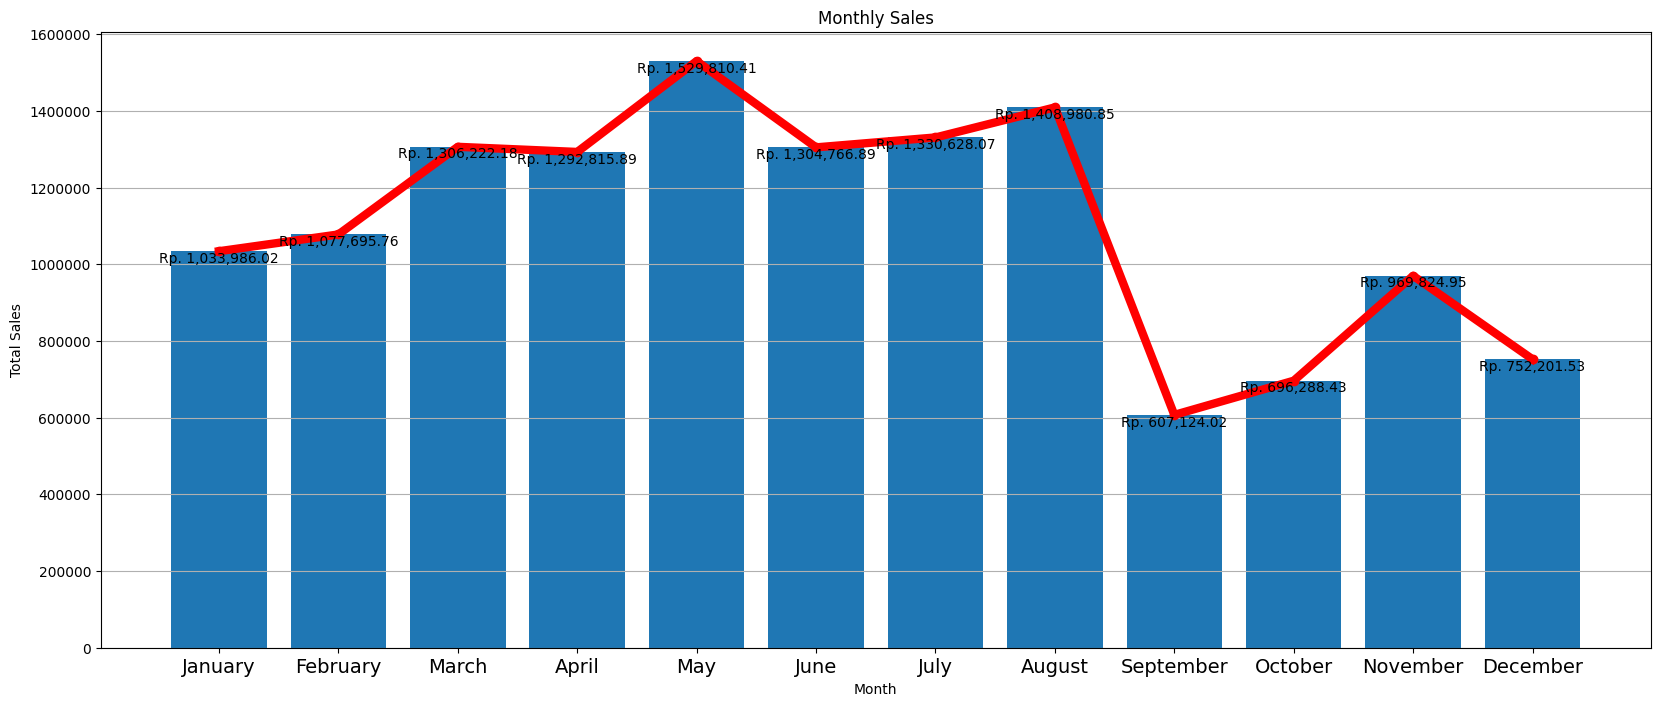

In [180]:
monthly_sales = df_sales.groupby('sales_month_name')[['sales', 'freight_value', 'profit']].sum()
monthly_sales.index = monthly_sales.index.astype(str)

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

month_type = pd.CategoricalDtype(categories = month_order, ordered=True)

monthly_sales.index = monthly_sales.index.astype(month_type)
monthly_sales = monthly_sales.sort_index()

# Tampilkan hasil
display(monthly_sales)

plt.figure(figsize = (20, 8))
bars = plt.bar(monthly_sales.index, monthly_sales['sales'], label = 'Bar - Sales')
plt.plot(monthly_sales.index, monthly_sales['sales'], color = 'red', 
         marker = 'o', label = 'Line - Sales', linewidth = 6)

plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(fontsize = 14)

plt.gca().yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter(useOffset = False))
plt.gca().ticklabel_format(style = 'plain', axis = 'y')  

plt.grid(axis = 'y')

for bar in bars:
    yval  =  bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, 
             f'Rp. {yval:,.2f}', 
             ha = 'center', va = 'top', fontsize = 10)

plt.show()

Grafik ini menampilkan monthly sales (penjualan bulanan) dalam bentuk bar chart dan line chart, yang memberikan gambaran mengenai fluktuasi penjualan selama beberapa bulan. 

1. Fluktuasi Bulanan yang Signifikan:

    - Terlihat adanya fluktuasi penjualan yang jelas antara bulan-bulan dalam grafik. Penjualan mencapai puncak tertinggi pada titik tertentu, yang disusul oleh penurunan tajam, dan ada beberapa bulan di mana penjualan mengalami peningkatan yang konsisten, diikuti oleh penurunan besar.

2. Puncak Penjualan:

    - Puncak tertinggi yang tercatat adalah Rp. 1.529.970,41, menunjukkan performa terbaik pada bulan tersebut. Penjualan mencapai puncak ini setelah beberapa bulan mengalami peningkatan bertahap.
    - Puncak kedua terjadi pada nilai Rp. 1.406.980,85, namun setelah itu ada penurunan signifikan ke angka Rp. 607.124,02.

3. Penurunan Setelah Puncak:

    - Setelah mencapai puncak, grafik menunjukkan penurunan besar pada periode berikutnya, di mana penjualan jatuh hampir setengah dari nilai puncaknya. Penurunan ini menunjukkan adanya perubahan mendadak yang perlu diselidiki.

4. Recovery Parsial:

    - Meskipun ada penurunan besar, terlihat beberapa tanda pemulihan di bulan-bulan berikutnya, dengan penjualan mencapai angka Rp. 969.824,95. Namun, pemulihan ini tidak sepenuhnya memulihkan nilai puncak sebelumnya.

Kesimpulan
1. Kinerja yang Tidak Konsisten:

    - Penjualan bulanan menunjukkan performa yang tidak stabil, di mana ada kenaikan dan penurunan yang signifikan. Ini menandakan adanya faktor-faktor tertentu yang memengaruhi penjualan secara drastis, seperti musim penjualan, kampanye promosi, atau perubahan pasar.

2. Penurunan Setelah Puncak:

    - Setelah mencapai penjualan tertinggi, ada penurunan tajam. Penurunan ini menandakan bahwa mungkin ada ketergantungan pada satu faktor sementara, seperti promosi jangka pendek atau kampanye musiman yang menyebabkan lonjakan penjualan, namun tidak dapat dipertahankan untuk periode berikutnya.

3. Recovery yang Parsial:

    - Setelah penurunan tajam, ada tanda-tanda pemulihan dalam penjualan, namun tidak kembali ke level puncak sebelumnya. Ini menunjukkan bahwa ada potensi untuk perbaikan, namun masih perlu strategi untuk mendorong pemulihan yang lebih konsisten.


#### Analisa : "Top 10 Product Sales"

In [181]:
df_product_sales = df_sales.groupby('product_cat_name').agg({'order_id' : 'count',
                                                             'sales' : 'sum'})
df_product_sales.columns = ['order_count', 'sales']
# df_product_sales.sort_values(by = ['order_count', 'sales'],
df_product_sales.sort_values(by = ['order_count'],
                          ascending = False,
                          inplace = True)
df_product_sales = df_product_sales.head(10)
df_product_sales = df_product_sales.iloc[::-1]

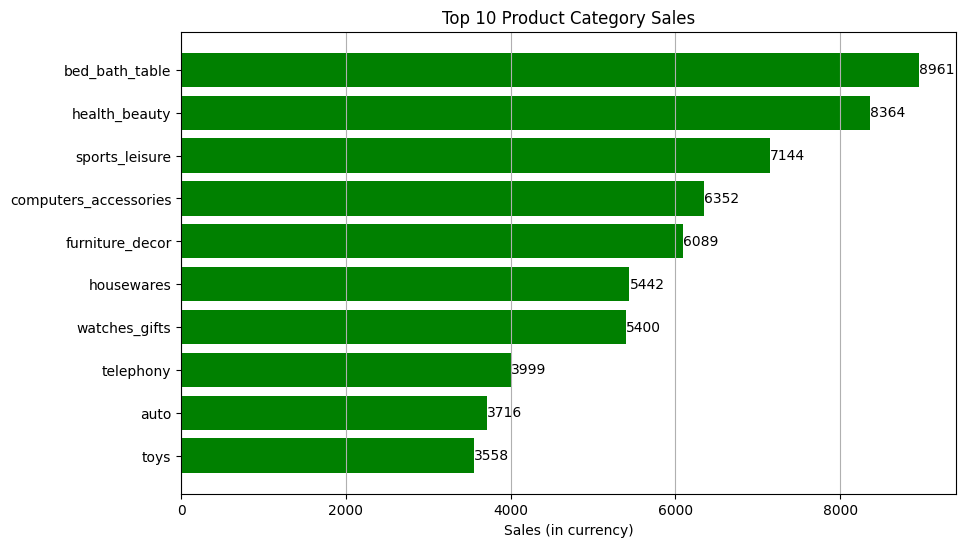

In [182]:
plt.figure(figsize = (10, 6))
bars = plt.barh(df_product_sales.index, df_product_sales['order_count'], color = 'g')

plt.title('Top 10 Product Category Sales')
plt.xlabel('Sales (in currency)')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', 
             va = 'center', ha = 'left', fontsize = 10)

plt.grid(axis='x')

plt.show()

Grafik ini adalah bar chart horizontal yang menampilkan penjualan dari 10 kategori produk teratas. Setiap bar mewakili jumlah penjualan untuk setiap kategori produk, dengan nilai tertinggi sebesar 8.961 untuk kategori bed_bath_table dan nilai terendah sebesar 3.558 untuk kategori toys.

Poin Utama dari Grafik:

1. Dominasi Kategori Bed Bath Table:

    - Kategori bed_bath_table memiliki penjualan tertinggi dengan nilai 8.961, yang menunjukkan bahwa produk dalam kategori ini sangat populer dan diminati oleh konsumen.

2. Peringkat Kategori Lain:

    - Kategori-kategori seperti health_beauty (8.364) dan sports_leisure (7.144) juga memiliki penjualan yang tinggi, menunjukkan performa yang solid dalam berbagai segmen produk.

3. Penjualan Lebih Rendah untuk Kategori Bawah:

    - Kategori seperti telephony, auto, dan toys berada di bagian bawah daftar dengan penjualan masing-masing 3.999 untuk telephony, 3.716 untuk auto, 3.558 untuk toys, menunjukkan bahwa produk dalam kategori ini tidak sepopuler kategori lain dalam 10 besar.

4. Distribusi Penjualan yang Tersebar:

    - Grafik menunjukkan bahwa, meskipun ada perbedaan dalam penjualan antara kategori tertinggi dan terendah, nilai-nilai penjualan masih relatif dekat. Kategori-kategori tersebut tidak terlalu jauh di bawah kategori dengan penjualan tertinggi.

Kesimpulan

1. Kategori Produk Tertentu Mendominasi Pasar:

    - Bed_bath_table jelas menjadi kategori dengan penjualan paling tinggi, diikuti oleh health_beauty dan sports_leisure. Ini menunjukkan bahwa produk rumah tangga, kecantikan, dan olahraga adalah segmen populer yang didorong oleh permintaan konsumen yang kuat.

2. Kategori Produk dengan Penjualan Lebih Rendah:

    - Toys, auto, dan telephony berada di posisi bawah dalam daftar. Meskipun berada di 10 besar, mereka memiliki penjualan yang jauh lebih rendah dibandingkan kategori teratas. Ini bisa disebabkan oleh kurangnya permintaan atau kompetisi yang lebih ketat di segmen tersebut.

#### Analisis : "Top 10 City Sales"

In [183]:
df_city_sales = df_sales.groupby('customer_city').agg({'order_id' : 'count',
                                                       'sales' : 'sum'})
df_city_sales.columns = ['order_count', 'sales']
# df_city_sales.sort_values(by = ['order_count', 'sales'],
df_city_sales.sort_values(by = ['sales', 'order_count'],
                          ascending = False,
                          inplace = True)
df_city_sales = df_city_sales.head(10)
df_city_sales

,order_count,sales
customer_city,,
sao paulo,14565,1894716.64
rio de janeiro,6365,959071.83
belo horizonte,2622,346959.97
brasilia,1856,275326.55
curitiba,1441,204592.19
campinas,1368,189820.24
porto alegre,1297,181467.94
salvador,1142,181158.30
guarulhos,1107,143660.44


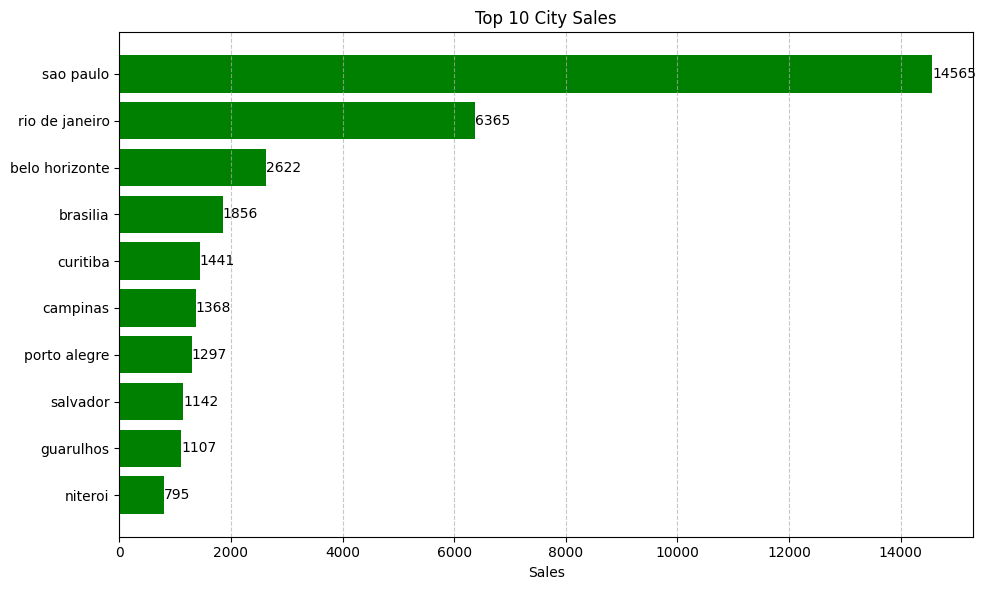

In [184]:
df_city_sales = df_city_sales.iloc[::-1]
plt.figure(figsize = (10, 6))
bars = plt.barh(df_city_sales.index, df_city_sales['order_count'], color = 'g')

plt.title('Top 10 City Sales')
plt.xlabel('Sales')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', 
             va = 'center', ha = 'left', fontsize = 10)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Grafik ini menunjukkan penjualan di 10 kota teratas. Setiap kota memiliki nilai penjualan yang berbeda, dengan São Paulo berada di peringkat pertama dengan penjualan 14.565 dan São Bernardo do Campo di posisi kesepuluh dengan penjualan 883.

Poin Utama dari Grafik:

1. Dominasi São Paulo:

    - São Paulo jelas mendominasi penjualan dengan nilai 14.565, hampir dua kali lipat dari kota peringkat kedua, Rio de Janeiro yang memiliki penjualan 6.365.
    - Dominasi ini menunjukkan bahwa São Paulo adalah pasar yang paling penting dan berkontribusi besar terhadap keseluruhan penjualan.

2. Keseluruhan Distribusi Penjualan:

    - Setelah São Paulo dan Rio de Janeiro, terdapat penurunan penjualan yang cukup signifikan pada kota-kota berikutnya. Kota-kota seperti Belo Horizonte dan Brasilia memiliki penjualan yang jauh lebih kecil, dengan nilai di bawah 2.000.
    - Kota-kota yang berada di bagian bawah grafik, seperti Guarulhos dan São Bernardo do Campo, memiliki penjualan di bawah 1.500, menunjukkan kontribusi yang relatif lebih kecil dibandingkan kota-kota besar.

3. Perbedaan Signifikan Antara Peringkat Teratas dan Terendah:

    - Terdapat perbedaan yang signifikan antara kota dengan penjualan tertinggi dan terendah. Penjualan di São Paulo sekitar 16 kali lebih besar dibandingkan dengan penjualan di São Bernardo do Campo.


Kesimpulan

1. Kota-Kota Besar Mendominasi Penjualan:

    - São Paulo dan Rio de Janeiro secara jelas memimpin, dengan São Paulo mendominasi secara substansial. Ini menunjukkan bahwa sebagian besar penjualan terkonsentrasi di kota-kota besar yang berpengaruh, terutama São Paulo.

2. Peluang di Kota-Kota Lain:

    - Ada penurunan penjualan yang tajam di kota-kota lain setelah Rio de Janeiro, terutama di kota-kota seperti Belo Horizonte dan Brasilia. Hal ini mungkin mengindikasikan bahwa ada kurangnya penetrasi pasar atau kurangnya daya beli di kota-kota ini, meskipun mereka masih masuk dalam 10 besar.

3. Perbedaan Kontribusi yang Signifikan:

    - Kesenjangan yang besar antara São Paulo dan kota lainnya menunjukkan ketergantungan yang tinggi pada kota-kota besar untuk kontribusi penjualan. Ini juga menunjukkan adanya potensi risiko jika terjadi perubahan dalam permintaan di São Paulo.

#### Analisa : "Year Order Sales Count" 

In [185]:
df_sales.head(2)

,order_id,items_count,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,shipping_limit_date,price,freight_value,product_cat_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_zip_code_prefix,seller_city,seller_state,seller_lat,seller_lng,sales,month_order,sales_year,sales_month,sales_month_name,profit
1,00018f77f2f0320c557190d7a144bdd3,1,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04,2017-05-12,2017-05-15,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03,239.9,19.93,pet_shop,56,239,2,30000,50,30,40,1,credit_card,3,259,4,2017-05-13,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,-20.205737,-50.926924,3471,sao paulo,SP,-23.564289,-46.519045,239.9,2017-04,2017,2017-04,April,47.98
2,000229ec398224ef6ca0657da4fc703e,1,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16,2018-01-22,2018-02-05,5b51032eddd242adc84c38acab88f23d,2018-01-18,199.0,17.87,furniture_decor,59,695,2,3050,33,13,33,1,credit_card,5,216,5,2018-01-23,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,-19.870383,-44.594355,37564,borda da mata,MG,-22.271648,-46.165556,199.0,2018-01,2018,2018-01,January,39.80


In [186]:
df_yearly_order = df_sales[['order_id', 'order_purchase_timestamp']].copy()
df_yearly_order['order_purchase_timestamp'] = df_yearly_order['order_purchase_timestamp'].dt.year

df_yearly_order = df_yearly_order.groupby('order_purchase_timestamp')['order_id'].count()
df_yearly_order.index = df_yearly_order.index.astype(str)

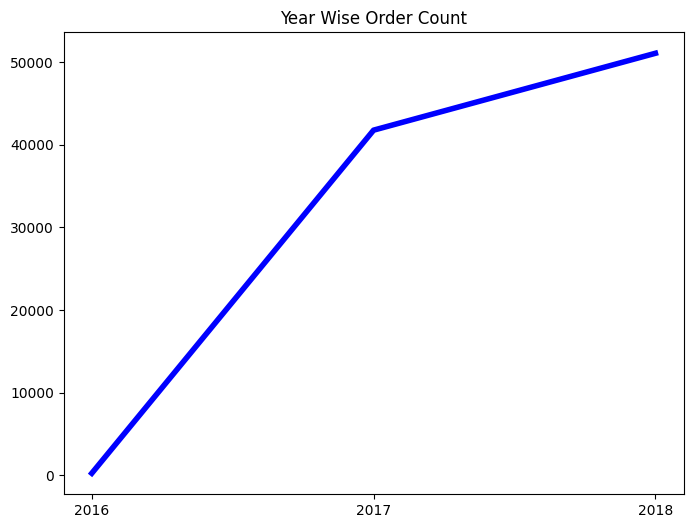

In [187]:
# Line Plot

plt.figure(figsize = (8, 6))
plt.plot(df_yearly_order, linewidth = 4, color = 'blue')
plt.title('Year Wise Order Count')
plt.show()

Grafik ini menunjukkan jumlah pesanan per tahun selama periode 2016 hingga 2018. Grafik ini menggambarkan tren peningkatan yang signifikan dalam jumlah pesanan dari tahun ke tahun.

Poin Utama dari Grafik:

1. Pertumbuhan Pesanan yang Eksponensial:

    - Pada tahun 2016, jumlah pesanan sangat rendah, yaitu hanya 268 pesanan. Namun, pada tahun 2017, jumlah pesanan meningkat secara signifikan menjadi 41.767, yang merupakan lonjakan pesanan yang sangat besar.
    - Pada tahun 2018, jumlah pesanan meningkat lebih lanjut hingga mencapai 51.065, menunjukkan pertumbuhan yang stabil meskipun laju peningkatan sedikit lebih lambat dibandingkan dengan pertumbuhan dari 2016 ke 2017.

2. Tren Pertumbuhan yang Positif:

    - Data ini menunjukkan bahwa bisnis telah mengalami pertumbuhan pesanan yang luar biasa selama tiga tahun berturut-turut, dengan angka pesanan meningkat secara substansial setiap tahunnya.

3. Peningkatan Bertahap di Tahun 2018:

    - Dari 2017 ke 2018, peningkatannya lebih moderat dibandingkan dengan tahun sebelumnya, tetapi tren tetap positif. Ini menunjukkan stabilitas dan kemampuan mempertahankan pasar yang baik setelah lonjakan pesanan yang besar pada tahun 2017.

Kesimpulan

1. Pertumbuhan yang Luar Biasa pada 2017:

    - Pertumbuhan dari 2016 ke 2017 adalah lonjakan terbesar dalam jumlah pesanan, menandakan adanya strategi bisnis yang sangat efektif atau perubahan dalam dinamika pasar yang sangat mendukung bisnis. Mungkin ini hasil dari promosi besar-besaran, peluncuran produk baru, atau ekspansi pasar yang berhasil.

2. Pertumbuhan Stabil di 2018:

    - Pertumbuhan pesanan tetap positif dari 2017 ke 2018, meskipun peningkatannya lebih lambat. Ini menunjukkan bahwa bisnis sudah mencapai tingkat pesanan yang stabil dan ada kematangan dalam strategi penjualan.

3. Peluang untuk Meningkatkan Pertumbuhan di Tahun-Tahun Mendatang:

    - Meskipun pertumbuhan stabil, laju peningkatan yang lebih lambat di 2018 bisa menjadi indikasi bahwa bisnis sudah mendekati titik jenuh di pasar tertentu. Oleh karena itu, strategi baru diperlukan untuk mempertahankan pertumbuhan pada tahun-tahun mendatang.

### Insight secara keseluruhan: 

1. Distribusi Penjualan Berdasarkan Waktu (Weekday vs Weekend Sales):
    - Penjualan lebih dominan terjadi pada hari kerja (weekday) dengan kontribusi 77% dari total penjualan, sementara weekend hanya menyumbang 23%.
    - Ini menunjukkan bahwa aktivitas pembelian lebih banyak terjadi pada hari-hari kerja, mungkin karena konsumen lebih sering berbelanja selama hari kerja daripada akhir pekan.

2. Review Score vs Average Shipping Days:
    - Terlihat korelasi negatif antara rating ulasan dengan lama pengiriman. Semakin tinggi rating yang diberikan pelanggan, semakin cepat pengiriman dilakukan. Pelanggan dengan rating 1 rata-rata mengalami pengiriman selama 16 hari, sementara yang memberikan rating 5 hanya 7 hari.
    - Pengalaman pelanggan sangat dipengaruhi oleh kecepatan pengiriman, yang berarti pengiriman cepat berhubungan dengan ulasan yang lebih baik.

3. Distribusi Pesanan Berdasarkan Metode Pembayaran:
    - Metode pembayaran kartu kredit mendominasi dengan 76% pesanan, diikuti oleh boleto (20%), sementara voucher dan debit card menyumbang bagian yang lebih kecil.
    - Ini menunjukkan bahwa mayoritas konsumen menggunakan kartu kredit sebagai preferensi pembayaran utama.

4. Top 10 City Sales:
    - São Paulo menjadi kota dengan kontribusi penjualan tertinggi, mencapai 14.565 pesanan, diikuti oleh Rio de Janeiro (6.365). Kota-kota lain seperti Belo Horizonte dan Brasilia memiliki penjualan yang jauh lebih rendah.
    - Ada ketergantungan besar pada kota-kota besar, terutama São Paulo, yang mendominasi lebih dari separuh dari total penjualan.

5. Monthly Wise Sales:
    - Penjualan bulanan menunjukkan tren peningkatan yang konsisten dari bulan ke bulan, dengan puncak penjualan mencapai Rp 1,529,870.41. Namun, terjadi penurunan drastis di beberapa bulan setelahnya.
    - Ada fluktuasi musiman dalam penjualan, mungkin terkait dengan event besar seperti promosi atau liburan.

6. Year Wise Orders Count:
    - Jumlah pesanan meningkat drastis dari tahun ke tahun, terutama antara 2016 hingga 2017. Pada 2018, pesanan mencapai 51.065 pesanan, yang menunjukkan pertumbuhan stabil.
    - Bisnis ini berada dalam fase pertumbuhan yang sangat kuat dan terus meningkat dari waktu ke waktu.


### Kesimpulan : 

1. Tren Positif dalam Penjualan:

    - Secara keseluruhan, grafik menunjukkan pertumbuhan yang kuat dari sisi pesanan, baik berdasarkan waktu, lokasi, maupun metode pembayaran. Penjualan bulanan dan tahunan mengalami peningkatan signifikan.

2. Keterlibatan yang Kuat dari Kota-Kota Tertentu:

    - Ada konsentrasi besar penjualan di beberapa kota besar seperti São Paulo dan Rio de Janeiro, yang mendominasi penjualan dibandingkan kota-kota lainnya.

3. Korelasi Pengiriman dan Ulasan:

    - Pengiriman yang lebih cepat sangat berpengaruh terhadap peningkatan rating ulasan pelanggan. Hal ini penting karena kepuasan pelanggan berkaitan langsung dengan waktu pengiriman.

4. Dominasi Pembayaran Kartu Kredit:

    - Kartu kredit menjadi metode pembayaran paling populer, mengindikasikan bahwa pelanggan lebih nyaman dengan metode pembayaran ini dibandingkan opsi lain seperti boleto atau debit card.

5. Peluang untuk Menstabilkan Penjualan Bulanan:

    - Ada beberapa fluktuasi dalam penjualan bulanan, dengan penurunan tajam di bulan-bulan tertentu. Ini mungkin terkait dengan faktor musiman atau kurangnya promosi di periode tertentu.

### Rekomendasi:

1. Fokus pada Pengiriman yang Cepat:

    - Karena kecepatan pengiriman berkorelasi dengan ulasan yang lebih baik, penting untuk mempercepat waktu pengiriman guna meningkatkan kepuasan pelanggan. Investasi dalam infrastruktur logistik dan kerjasama dengan jasa pengiriman yang cepat bisa membantu mempertahankan rating yang tinggi.

2. Perluas Pasar di Luar São Paulo dan Rio de Janeiro:

    - Mengurangi ketergantungan pada beberapa kota besar seperti São Paulo dan Rio de Janeiro dengan menggencarkan promosi di kota-kota lain yang memiliki potensi pasar, seperti Belo Horizonte dan Brasilia, untuk menciptakan keseimbangan yang lebih baik dalam distribusi penjualan.

3. Memaksimalkan Penjualan Akhir Pekan:

    - Penjualan lebih rendah selama akhir pekan memberikan peluang untuk meningkatkan promosi akhir pekan. Penawaran spesial atau diskon khusus di hari Sabtu dan Minggu bisa mendorong peningkatan aktivitas belanja selama akhir pekan.

4. Diversifikasi Metode Pembayaran:

    - Meskipun kartu kredit mendominasi sebagai metode pembayaran, menyediakan inovasi pembayaran lain (misalnya dompet digital atau cicilan tanpa kartu) bisa menarik lebih banyak pelanggan yang mungkin tidak memiliki akses ke kartu kredit.

5. Stabilkan Penjualan Bulanan:

    - Untuk menghindari fluktuasi yang besar, buat kampanye pemasaran yang konsisten sepanjang tahun. Fokuskan pada event atau musim penjualan seperti liburan, penawaran musiman, dan promosi lainnya untuk meminimalkan penurunan di bulan-bulan yang biasanya mengalami penurunan.

6. Tingkatkan Retensi Pelanggan di Tahun-Tahun Mendatang:

    - Dengan melihat pertumbuhan pesanan yang konsisten setiap tahun, sangat penting untuk meningkatkan program loyalitas atau penawaran eksklusif untuk menjaga retensi pelanggan. Pengalaman pelanggan yang baik dapat membantu mempertahankan pelanggan jangka panjang.